In [3]:
#Import Packages
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
%matplotlib inline

In [133]:
#Import file
df=pd.read_csv('D:\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [134]:
#Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [135]:
#Explore data
df.shape
type(df)
df.size
df.head()
df.tail()

(7043, 21)

pandas.core.frame.DataFrame

147903

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [136]:
#Checking for missing values
pd.isnull(df).any()
pd.isnull(df).sum()
df.info()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [137]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [138]:
print('Count of labels')
df.groupby("Churn").size()

Count of labels


Churn
No     5174
Yes    1869
dtype: int64

In [139]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

In [140]:
df1=df.dropna(how='any')
df1.info()
         

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(1), int16(2), int64(2), int8(16)
memory usage: 357.

In [141]:
df1['Y']=dfn
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null int16
gender              7043 non-null int8
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
Y                   7043 non-null int64
dtypes: float64(1), int16(2

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [142]:
x_catg=df1.loc[:,('gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod')]
x_catg.head()
x_catg.shape
x_catg.describe()
#x_catg.isnull()
#x_catg.dropna(how="any")
#x_catg.isnull()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


(7043, 15)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329
std,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000


In [143]:
x_num=df1.loc[:,('SeniorCitizen','tenure','MonthlyCharges','TotalCharges')]
x_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,2505
1,0,34,56.95,1466
2,0,2,53.85,157
3,0,45,42.30,1400
4,0,2,70.70,925


In [144]:
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [145]:
x=pd.concat([x_num1,x_num],axis=1)
x.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,2505
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1466
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,157
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1400
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,925


In [146]:
y=df1['Y']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Y, dtype: int64

In [147]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(5282, 19)

(1761, 19)

(5282,)

(1761,)

pandas.core.frame.DataFrame

In [148]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [149]:
log.fit(train_x,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
log.coef_

array([[ -6.84506144e-03,   5.39188443e-02,  -1.01182453e-01,
         -9.57044277e-01,   9.88746217e-02,   2.55621433e-01,
         -2.60988718e-01,  -1.29740643e-01,  -1.00265200e-01,
         -2.42049247e-01,   3.02556093e-04,   3.02594818e-02,
         -6.34323572e-01,   2.95337582e-01,   3.66352082e-02,
          2.22892935e-01,  -3.68965967e-02,   2.81314845e-02,
          5.40905654e-05]])

In [151]:
coeff = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))], axis=1)
coeff.columns = ("Variable","Coeff")
coeff.sort_values('Variable', ascending=True)

,Variable,Coeff
12,Contract,-0.634324
2,Dependents,-0.101182
8,DeviceProtection,-0.100265
5,InternetService,0.255621
17,MonthlyCharges,0.028131
4,MultipleLines,0.098875
7,OnlineBackup,-0.129741
6,OnlineSecurity,-0.260989
13,PaperlessBilling,0.295338
1,Partner,0.053919


In [152]:
classes = log.predict(test_x)
print(classes.size)
print('Positive Cases in test data:', test_y[test_y == 1].shape[0])
print('Negative Cases in test data:', test_y[test_y == 0].shape[0])

1761
Positive Cases in test data: 434
Negative Cases in test data: 1327


In [153]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y,classes))
print("Precision/Recall Metrics")
print(metrics.classification_report(test_y,classes))
print("AUC")
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score
0.808063600227
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.86      0.89      0.88      1327
          1       0.63      0.55      0.59       434

avg / total       0.80      0.81      0.80      1761

AUC


0.72146468768123229

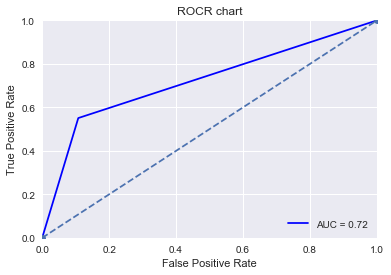

In [154]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROCR chart')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Confusion Matrix


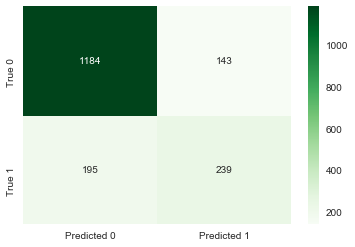

In [155]:
#Confusion Matrix
print('Confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1 = ['Predicted 0','Predicted 1']
lbl2 = ['True 0','True 1']
sns.heatmap(cf, annot=True, cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [181]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
dfd=DecisionTreeClassifier(criterion="gini",max_depth=2)
dfd.fit(train_x,train_y)
classes=dfd.predict(test_x)
classes=dfd.predict(test_x)
auc=metrics.roc_auc_score(test_y,classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.75500331644435492

In [185]:
#Plot the tree
from sklearn import tree
import pydotplus as pydot
import graphviz
dot_data = tree.export_graphviz(dfd, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df") 
dot_data= tree.export_graphviz(dfd, out_file= None, 
                         feature_names=x,  
                         class_names=y,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
    

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'df'], make sure the Graphviz executables are on your systems' PATH

In [186]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

In [187]:
df2, targets = encode_target(df, "Name")
print("* df2.head()", df2[["Target", "Name"]].head(),
      sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", "Name"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")

KeyError: 'Name'